In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
processed_path_1 = '/home/exx/arthur/data/rocklin/Processed_K50_dG_datasets/Tsuboyama2023_Dataset1_20230416.csv'
processed_path_2 = '/home/exx/arthur/data/rocklin/Processed_K50_dG_datasets/Tsuboyama2023_Dataset2_Dataset3_20230416.csv'

# df_1 = pd.read_csv(processed_path_1)
df_2 = pd.read_csv(processed_path_2)

/tmp/ipykernel_457614/1793142174.py:5: DtypeWarning: Columns (30,31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(processed_path_2)


In [3]:
triple = pd.read_csv('/home/exx/arthur/data/rocklin/Processed_K50_dG_datasets/Triple_DMS_list.csv')
double = pd.read_csv('/home/exx/arthur/data/rocklin/Processed_K50_dG_datasets/Double_DMS_list.csv')
single = pd.read_csv('/home/exx/arthur/data/rocklin/Processed_K50_dG_datasets/Single_DMS_list.csv')

In [4]:
print(len(triple))
print(len(double))
print(len(single))

36
725
983


In [40]:
df_2.columns

Index(['name', 'dna_seq', 'log10_K50_t', 'log10_K50_t_95CI_high',
       'log10_K50_t_95CI_low', 'log10_K50_t_95CI', 'fitting_error_t',
       'log10_K50unfolded_t', 'deltaG_t', 'deltaG_t_95CI_high',
       'deltaG_t_95CI_low', 'deltaG_t_95CI', 'log10_K50_c',
       'log10_K50_c_95CI_high', 'log10_K50_c_95CI_low', 'log10_K50_c_95CI',
       'fitting_error_c', 'log10_K50unfolded_c', 'deltaG_c',
       'deltaG_c_95CI_high', 'deltaG_c_95CI_low', 'deltaG_c_95CI', 'deltaG',
       'deltaG_95CI_high', 'deltaG_95CI_low', 'deltaG_95CI', 'aa_seq_full',
       'aa_seq', 'mut_type', 'WT_name', 'WT_cluster', 'log10_K50_trypsin_ML',
       'log10_K50_chymotrypsin_ML', 'dG_ML', 'ddG_ML', 'Stabilizing_mut',
       'pair_name'],
      dtype='object')

In [5]:
names = df_2['WT_name']

In [6]:
df_2.head()

,name,dna_seq,log10_K50_t,log10_K50_t_95CI_high,log10_K50_t_95CI_low,log10_K50_t_95CI,fitting_error_t,log10_K50unfolded_t,deltaG_t,deltaG_t_95CI_high,...,aa_seq,mut_type,WT_name,WT_cluster,log10_K50_trypsin_ML,log10_K50_chymotrypsin_ML,dG_ML,ddG_ML,Stabilizing_mut,pair_name
0,EA|run2_0325_0005.pdb,TCTGCTGGCGGCTCCGCGGGTGGTTCCGCTGGTGGTGACGAAGTTA...,1.227105,1.255092,1.197643,0.057449,0.063626,-0.997071,2.998711,3.038485,...,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,wt,EA|run2_0325_0005.pdb,EEHH,1.2271050771597385,1.2135682995736825,3.3321258839433834,0.01719762915616707,False,NaN
1,EA|run2_0325_0005.pdb_wtm,TCCGCGGGTGGTTCCGCTGGCGGTTCTGCGGGCGGTGACGAAGTTA...,1.297559,1.381800,1.243835,0.137965,0.092264,-0.997071,3.099109,3.220506,...,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,wt,EA|run2_0325_0005.pdb,EEHH,1.2975591020191513,1.2201805304541726,3.3998316632160224,0.08490340842880606,False,NaN
2,EA|run2_0325_0005.pdb_wte,TCCGCTGGTGGCTCTGCGGGCGGTTCTGCTGGTGGCGACGAAGTTA...,1.262708,1.314787,1.239876,0.074911,0.092305,-0.997071,3.049332,3.123805,...,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,wt,EA|run2_0325_0005.pdb,EEHH,1.2627076164958364,1.169472475788951,3.315782210420261,0.0008539556330444675,False,NaN
3,EA|run2_0325_0005.pdb_wty,TCCGCTGGTGGCTCCGCGGGTGGTTCCGCTGGTGGTGACGAAGTTA...,1.244782,1.314467,1.195005,0.119462,0.074537,-0.997071,3.023818,3.123346,...,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,wt,EA|run2_0325_0005.pdb,EEHH,1.2447822859698547,1.1543165166325822,3.272933265369934,-0.04199498941728219,False,NaN
4,EA|run2_0325_0005.pdb_wth,TCCGCTGGCGGCTCCGCTGGCGGCTCCGCTGGCGGCTCCGCTGGCG...,0.998142,1.134508,0.723845,0.410663,0.315576,-1.010140,2.694897,2.885558,...,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,wt,EA|run2_0325_0005.pdb,EEHH,0.9981417661631856,0.6573573370630326,2.570241917260095,-0.7446863375271211,False,NaN


In [36]:
dG = df_2['deltaG']
dG_ML = df_2['dG_ML']
ddG_ML = df_2['ddG_ML']

In [41]:
df_2[['deltaG', 'dG_ML', 'ddG_ML', 'aa_seq', 'WT_name']]

,deltaG,dG_ML,ddG_ML,aa_seq,WT_name
0,3.332126,3.3321258839433834,0.01719762915616707,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,EA|run2_0325_0005.pdb
1,3.399832,3.3998316632160224,0.08490340842880606,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,EA|run2_0325_0005.pdb
2,3.315782,3.315782210420261,0.0008539556330444675,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,EA|run2_0325_0005.pdb
3,3.272933,3.272933265369934,-0.04199498941728219,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,EA|run2_0325_0005.pdb
4,2.570242,2.570241917260095,-0.7446863375271211,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,EA|run2_0325_0005.pdb
...,...,...,...,...,...
776293,-2.850140,<-1,-,NQASVVANQLIPINTALTLVMMRSEVVTPVGPPAEDIPRIVGMQVN...,9AME.pdb
776294,-3.924992,<-1,-,NQASVVANQLIPINTALTLVMMRSEVVTPVGPPAEDIPRWVGMQVN...,9AME.pdb
776295,-2.365774,<-1,-,NQASVVANQLIPINTALTLVMMRSEVVTPVGPPAEDIPRYVGMQVN...,9AME.pdb
776296,-1.961486,<-1,-,NQASVVANQLIPINTALTLVMMRSEVVTPVGPPAEDIPRFVGMQVN...,9AME.pdb


In [7]:
domain_names = set()
for n in names:
    domain_names.add(n.split('.')[0])

In [8]:
np.random.seed(0)
# Convert the set to a list for indexing
domain_names_list = list(domain_names)

# Shuffle the list to ensure randomness
np.random.shuffle(domain_names_list)

# Calculate the split sizes
total = len(domain_names_list)
train_size = int(0.70 * total)
val_size = int(0.15 * total)
test_size = total - train_size - val_size  # Ensure remaining goes to test

# Split into train, val, test
train_split = domain_names_list[:train_size]
val_split = domain_names_list[train_size:train_size + val_size]
test_split = domain_names_list[train_size + val_size:]

# Print the results
print("Train Split:", train_split)
print("Validation Split:", val_split)
print("Test Split:", test_split)

# Save train split
with open("rocklin/train_split.txt", "w") as f:
    for item in train_split:
        f.write(f"{item}\n")

# Save validation split
with open("rocklin/val_split.txt", "w") as f:
    for item in val_split:
        f.write(f"{item}\n")

# Save test split
with open("rocklin/test_split.txt", "w") as f:
    for item in test_split:
        f.write(f"{item}\n")

Train Split: ['2LJ3', '2KVS', '2LXK', '2L7M', '2YSB', '2CJJ', 'XX|run8_0733_0006', 'EEHEE_rd3_1615', '2MC5', '5VNT', 'GG|run4_0284_0002', '1UFM', '2AMI', 'r4_412_TrROS_Hall', '1PGA', 'XX|run6_1020_0004', 'v2_2L15', 'v2_2LXE', 'XX|run8_1063_0003', '2GP8', 'HHH_rd1_0244', 'v2K43S_2KVV', 'HHH_rd4_0676', '2B88', 'v2_1OGW', '5UYO', '1E0L', 'GG|run3_1315_0003', 'EEHEE_rd3_0146', '1GYZ', '2I5L', '7MSI', 'HEEH_KT_rd6_0007', 'GG|run1_1390_0006', 'v2_2M5A', '2LVN', '2WXC', '2LO1', 'GG|run6_0851_0003', '2BTT', '2LX2', 'EA|run2_0325_0005', 'EHEE_rd4_0864', 'EEHEE_rd3_1587', '1GJS', '2MYX', 'EEHEE_rd4_0308', 'HHH_rd4_0870', 'EEHEE_rd3_1702', 'EHEE_rd4_0098', 'EEHEE_rd4_0371', '1A32', '2KCM', '2LGW', '1YU5', 'EEHEE_rd4_0469', 'GG|run5_1309_0004', '2LC2', 'EHEE_rd4_0086', '1W4F', '1EM7', '2HBB', 'EHEE_rd2_1106', '2K1B', 'r3_162_TrROS_Hall', '2M6Y', 'GG|run6_0775_0006', '2L2P', 'HEEH_KT_rd6_0746', '1QKH', '2YSF', '2OCH', '5UP5', '1EKL', 'HHH_rd1_0335', 'r11_569_TrROS_Hall', '1LP1', 'HHH_rd1_0949', '1P

In [9]:
train_seq_cnt, val_seq_cnt, test_seq_cnt = 0, 0, 0
for n in names:
    if n.split('.')[0] in train_split:
        train_seq_cnt += 1
    elif n.split('.')[0] in val_split:
        val_seq_cnt += 1
    elif n.split('.')[0] in test_split:
        test_seq_cnt += 1
print(f'There are {train_seq_cnt} training sequences')
print(f'There are {val_seq_cnt} validation sequences')
print(f'There are {test_seq_cnt} test sequences')

There are 559659 training sequences
There are 118139 validation sequences
There are 98500 test sequences


In [12]:
# Specify the directory
directory = '/home/exx/arthur/data/rocklin/AlphaFold_model_PDBs'

# Count the number of .pdb files
pdb_files = [f for f in os.listdir(directory) if f.endswith('.pdb')]
print(f"There are {len(pdb_files)} .pdb files in the directory.")
for name in domain_names_list:
    name = name.replace("|", ':')
    name = name.split('.')[0]
    path = os.path.join('/home/exx/arthur/data/rocklin/AlphaFold_model_PDBs', f'{name}.pdb')
    if not os.path.exists(path):
        print(path)

There are 862 .pdb files in the directory.


In [13]:
with open('rocklin/train_split.txt', 'r') as file:
    train_names = file.readlines()
train_names = [line.strip() for line in train_names]

with open('rocklin/val_split.txt', 'r') as file:
    val_names = file.readlines()
val_names = [line.strip() for line in val_names]

In [14]:
from protein_mpnn_utils import parse_PDB
from tqdm import tqdm
pdb_dict_train = []
for name in tqdm(train_names):
    name = name.replace("|", ':')
    path = os.path.join('/home/exx/arthur/data/rocklin/AlphaFold_model_PDBs', f'{name}.pdb')
    pdb_dict_train.append(parse_PDB(path)[0])


100%|██████████| 285/285 [00:39<00:00,  7.20it/s]


In [15]:
pdb_dict_val = []
for name in tqdm(val_names):
    name = name.replace("|", ':')
    path = os.path.join('/home/exx/arthur/data/rocklin/AlphaFold_model_PDBs', f'{name}.pdb')
    pdb_dict_val.append(parse_PDB(path)[0])

100%|██████████| 61/61 [00:08<00:00,  7.27it/s]


In [16]:
for dict in pdb_dict_train:
    dict['masked_list'] = ['A']
    dict['visible_list'] = []
for dict in pdb_dict_val:
    dict['masked_list'] = ['A']
    dict['visible_list'] = []

In [17]:
from training.utils import worker_init_fn, get_pdbs, loader_pdb, build_training_clusters, PDB_dataset, StructureDataset, StructureLoader
dataset_train = StructureDataset(pdb_dict_train, truncate=None, max_length=3000) 
dataset_valid = StructureDataset(pdb_dict_val, truncate=None, max_length=3000)

loader_train = StructureLoader(dataset_train, batch_size=10000)
loader_valid = StructureLoader(dataset_valid, batch_size=10000)

In [18]:
pdb_dict_train[0].keys()

dict_keys(['seq_chain_A', 'coords_chain_A', 'name', 'num_of_chains', 'seq', 'masked_list', 'visible_list'])

In [19]:
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
device = torch.device("cuda")

In [20]:
from training.model_utils import featurize, loss_smoothed, loss_nll, get_std_opt, ProteinMPNN

model = ProteinMPNN(node_features=128, 
                    edge_features=128, 
                    hidden_dim=128, 
                    num_encoder_layers=3, 
                    num_decoder_layers=3, 
                    k_neighbors=48, 
                    dropout=0.1, 
                    augment_eps=0.2)
model.to(device)

# checkpoint = torch.load('soluble_model_weights/v_48_020.pt')
# total_step = checkpoint['step'] #write total_step from the checkpoint
# epoch = checkpoint['epoch'] #write epoch from the checkpoint
# model.load_state_dict(checkpoint['model_state_dict'])
optimizer = get_std_opt(model.parameters(), 128, 0)


In [34]:
losses = []
for e in tqdm(range(100)):
    model.train()
    train_sum, train_weights = 0., 0.
    train_acc = 0.
    for _, batch in enumerate(loader_train):
        X, S, mask, lengths, chain_M, residue_idx, mask_self, chain_encoding_all = featurize(batch, device)
        optimizer.zero_grad()
        mask_for_loss = mask*chain_M

        log_probs = model(X, S, mask, chain_M, residue_idx, chain_encoding_all)
        _, loss_av_smoothed = loss_smoothed(S, log_probs, mask_for_loss)
        loss_av_smoothed.backward()

        optimizer.step()
        
        loss, loss_av, true_false = loss_nll(S, log_probs, mask_for_loss)
    
        train_sum += torch.sum(loss * mask_for_loss).cpu().data.numpy()
        train_acc += torch.sum(true_false * mask_for_loss).cpu().data.numpy()
        train_weights += torch.sum(mask_for_loss).cpu().data.numpy()
        losses.append(loss_av_smoothed)


  0%|          | 0/100 [00:00<?, ?it/s]/home/exx/anaconda3/envs/arthur/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/exx/anaconda3/envs/arthur/lib/python3.12/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


109
175


  1%|          | 1/100 [00:01<01:41,  1.02s/it]

175
109


  2%|▏         | 2/100 [00:02<01:38,  1.00s/it]

109
175


  3%|▎         | 3/100 [00:03<01:36,  1.00it/s]

109
175


  4%|▍         | 4/100 [00:03<01:35,  1.00it/s]

175
109


  5%|▌         | 5/100 [00:04<01:34,  1.00it/s]

175
109


  6%|▌         | 6/100 [00:05<01:33,  1.00it/s]

109
175


  7%|▋         | 7/100 [00:06<01:32,  1.00it/s]

109
175


  8%|▊         | 8/100 [00:08<01:32,  1.00s/it]

175
109


  9%|▉         | 9/100 [00:09<01:31,  1.00s/it]

175
109


 10%|█         | 10/100 [00:10<01:30,  1.01s/it]

175
109


 10%|█         | 10/100 [00:11<01:39,  1.10s/it]


KeyboardInterrupt: 

In [31]:
X.shape

torch.Size([109, 74, 4, 3])

In [33]:
S

tensor([[ 8, 14, 19,  ...,  0,  0,  0],
        [16,  5,  7,  ...,  0,  0,  0],
        [16,  4,  3,  ...,  0,  0,  0],
        ...,
        [12, 17, 19,  ...,  5,  0,  0],
        [17,  5,  2,  ...,  2,  0,  0],
        [15, 12,  3,  ...,  7, 15, 13]], device='cuda:0')

In [32]:
S.shape

torch.Size([109, 74])

In [28]:
log_probs.shape

torch.Size([109, 74, 21])

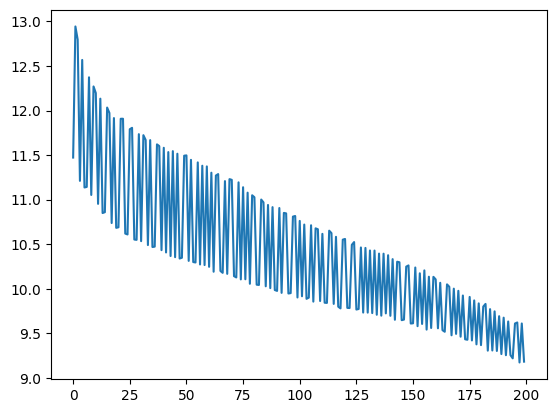

In [26]:
import matplotlib.pyplot as plt
losses = [l.item() for l in losses]
plt.plot(losses)

In [ ]:
# pseudo code

